# IMPORTING REQUIRED LIBRARIES

In [ ]:
from tensorflow import keras
from keras.applications.resnet50 import ResNet50
from keras.utils.vis_utils import plot_model
from glob import glob
from keras.models import Model
from keras.layers import Flatten,Dense,Dropout,Softmax
from keras.optimizers import Adam

# DATA ENTRY

In [ ]:
Image_size = [224,224]
valid_path = "/content/drive/MyDrive/Car/Datasets/Test"
train_path = "/content/drive/MyDrive/Car/Datasets/Train"

#CREATING THE MODEL AND ASSIGNING THE WEIGHTS

In [ ]:
resnet = ResNet50(include_top=False , input_shape=Image_size+[3],weights='imagenet')

94773248/94765736 [==============================] - 1s 0us/step


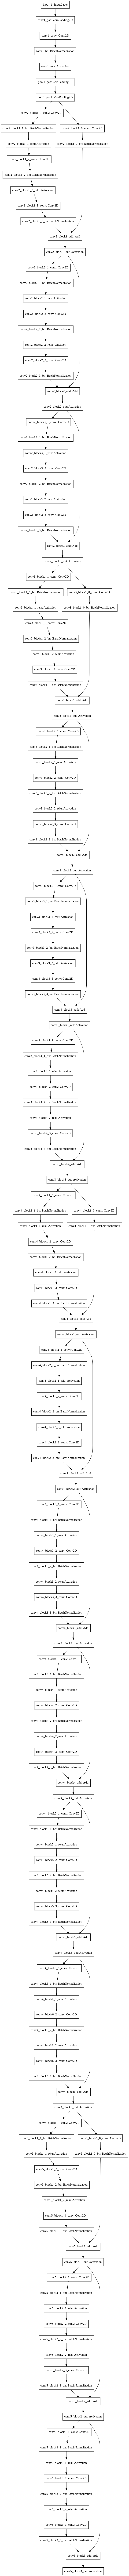

In [ ]:
plot_model(resnet)

In [ ]:
for layer in resnet.layers:
  layer.trainable = False

# TO GET THE NUMBER OF CLASSES IN OUTPUT

In [ ]:
folders = glob("/content/drive/MyDrive/Car/Datasets/Train/*")
folders

['/content/drive/MyDrive/Car/Datasets/Train/mercedes',
 '/content/drive/MyDrive/Car/Datasets/Train/audi',
 '/content/drive/MyDrive/Car/Datasets/Train/lamborghini']

#Adding Extra Layers

In [ ]:
x = Flatten()(resnet.output)

# Creating output layer

In [ ]:
prediction = Dense(len(folders),activation='softmax')(x)

# Creating Model

In [ ]:
model = Model(inputs = resnet.input , outputs = prediction)

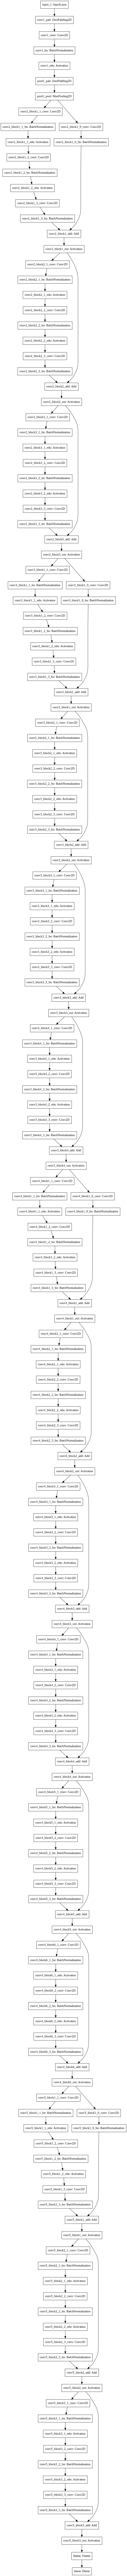

In [ ]:
plot_model(model)

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Car/Datasets/Train",target_size=(224,224),batch_size=32,class_mode='categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Car/Datasets/Test",target_size=(224,224),batch_size=32,class_mode='categorical')

Found 58 images belonging to 3 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 65s 40s/step - loss: 5.2341 - accuracy: 0.4271 - val_loss: 4.1866 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 20s 14s/step - loss: 4.6158 - accuracy: 0.3333 - val_loss: 12.1725 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 20s 14s/step - loss: 7.8131 - accuracy: 0.4271 - val_loss: 12.3293 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 20s 15s/step - loss: 7.0113 - accuracy: 0.4062 - val_loss: 8.4829 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 20s 14s/step - loss: 4.3409 - accuracy: 0.4167 - val_loss: 1.8085 - val_accuracy: 0.2414
Epoch 6/50
2/2 [==============================] - 20s 14s/step - loss: 1.6201 - accuracy: 0.4375 - val_loss: 3.5649 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 20s 14s/step - loss: 4.1779 - accuracy: 0.4167 - val_loss: 1.8441 - val_accuracy: 0.4655
Epoch 8/50
2/2 [=========

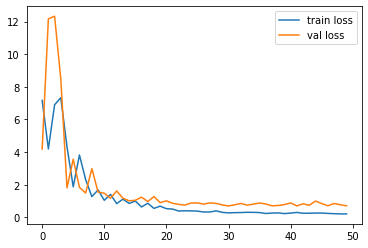

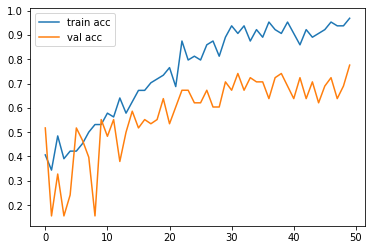

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[1.07617797e-02, 9.01454866e-01, 8.77834186e-02],
       [1.22336626e-01, 8.48371625e-01, 2.92917024e-02],
       [2.10950803e-02, 2.31287152e-01, 7.47617781e-01],
       [7.22461402e-01, 5.52165583e-02, 2.22322032e-01],
       [1.30874351e-01, 6.48670256e-01, 2.20455393e-01],
       [1.78278953e-01, 5.33616900e-01, 2.88104206e-01],
       [4.14683446e-02, 2.26857699e-02, 9.35845852e-01],
       [5.96510589e-01, 1.84379011e-01, 2.19110340e-01],
       [4.24152672e-01, 1.05668388e-01, 4.70178992e-01],
       [1.52719282e-02, 9.24600482e-01, 6.01276606e-02],
       [3.03393994e-02, 2.48010624e-02, 9.44859564e-01],
       [1.77070796e-02, 7.69564390e-01, 2.12728560e-01],
       [4.32107737e-03, 9.57650900e-01, 3.80279943e-02],
       [1.17108540e-03, 9.93622005e-01, 5.20684477e-03],
       [4.46721092e-02, 6.62213087e-01, 2.93114752e-01],
       [4.52776614e-04, 9.98077989e-01, 1.46931142e-03],
       [7.83705711e-02, 6.43609047e-01, 2.78020352e-01],
       [1.17805541e-01, 1.59671

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Car/Datasets/Test/audi/23.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)

In [ ]:
x =x /255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
preds = model.predict(x)
preds=np.argmax(preds, axis=1)
if preds==1:
  preds="The Car IS Audi"
elif preds==2:
  preds="The Car is Lamborghini"
else:
  preds="The Car Is Mercedes"
print(preds)

The Car is Lamborghini
